## Другие методы кластеризации

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler

### Получить данные

In [3]:
mall = pd.read_csv("../../data/mall_customers.csv")

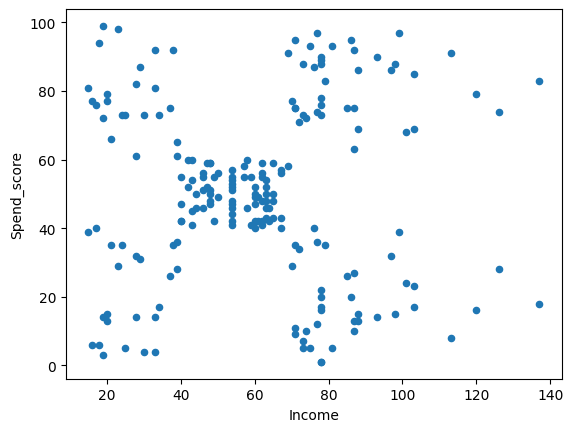

In [4]:
mall.rename({'Annual Income (k$)':'Income', 'Spending Score (1-100)':'Spend_score'}, axis=1, inplace=True)
mall.plot.scatter(x='Income', y='Spend_score')
plt.show()

### Нормализуем данные

In [5]:
mall_scaled = mall.copy()
cols_to_scale = ['Age', 'Income', 'Spend_score']

scaler = StandardScaler()
mall_scaled[cols_to_scale] = scaler.fit_transform(mall_scaled[cols_to_scale])

### Параметры для кластеризации

In [6]:
cluster_cols = ['Income', 'Spend_score']
markers = ['x', '*', '.', '|', '_', '1', '2']

## Mean-shift метод

Это метод плохо масштабируется при больших данных в отличии от k-mean.

Не надо указывать кол-во кластеров, зато надо найти пропускную способность. Для этого используется estimate_bandwidth.

Задать параметр пропускной способности вручную.

In [7]:
bandwidth = 0.9

In [8]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(mall_scaled[cluster_cols])
X = mall_scaled[cluster_cols]
mall_scaled['Cluster']= ms.predict(X)

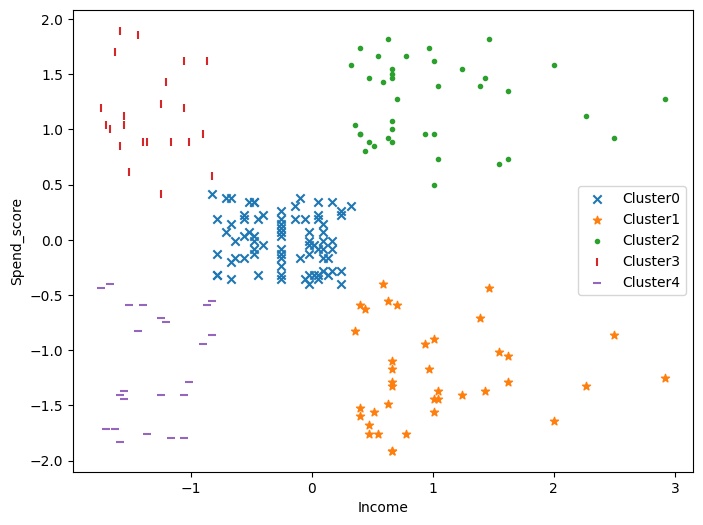

In [9]:
plt.figure(figsize=[8,6])

for clust in range(mall_scaled.Cluster.nunique()):
    temp = mall_scaled[mall_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, 
                marker=markers[clust], 
                label="Cluster"+str(clust))
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.legend()
plt.show()

Расчет оптимальной полосы пропускаяния. Квантиль задан произвольно.

In [10]:
bandwidth = estimate_bandwidth(mall_scaled[cluster_cols], quantile=0.1)
print(bandwidth)

0.6487582521320147


In [11]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(mall_scaled[cluster_cols])
mall_scaled['Cluster']= ms.predict(mall_scaled[cluster_cols])

Кол-во уникальных кластеров

In [12]:
mall_scaled.Cluster.nunique()

7

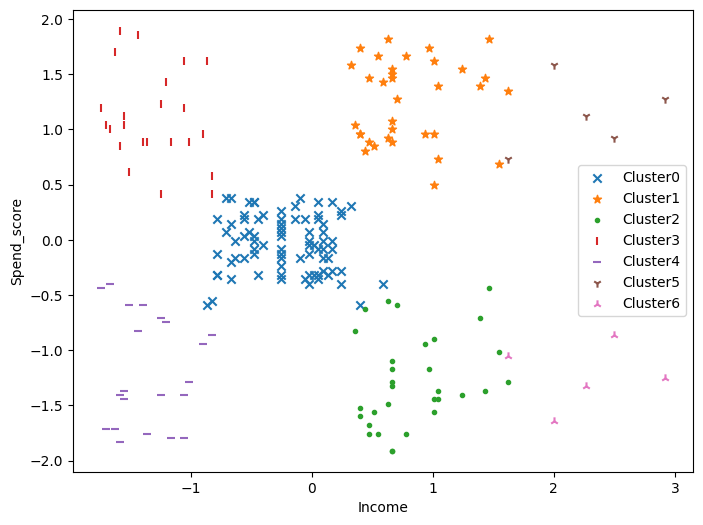

In [13]:
plt.figure(figsize=[8,6])
for clust in range(mall_scaled.Cluster.nunique()):
    temp = mall_scaled[mall_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score,
                marker=markers[clust],
                label="Cluster"+str(clust),)
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.legend()
plt.show()

Пропускная способность для квантиля 0,15

In [14]:
bandwidth = estimate_bandwidth(mall_scaled[cluster_cols], quantile=0.15)
print(bandwidth)

0.8582301835333547


In [15]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(mall_scaled[cluster_cols])
mall_scaled['Cluster']= ms.predict(mall_scaled[cluster_cols])
mall_scaled.Cluster.nunique()

5

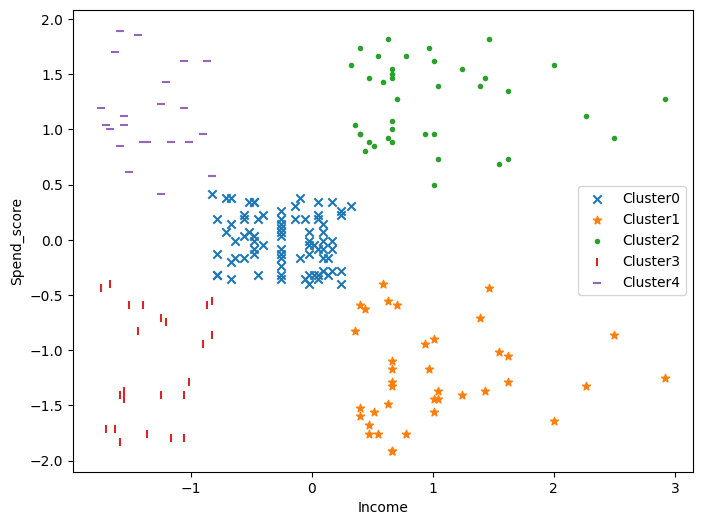

In [16]:
plt.figure(figsize=[8,6])
for clust in range(mall_scaled.Cluster.nunique()):
    temp = mall_scaled[mall_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score,
                marker=markers[clust],
                label="Cluster"+str(clust))
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.legend()
plt.show()

## K-modes и K-prototypes

k-mean - для количественных данных
k-modes - для категориальных данных
k-prototypes - когда есть сочетание для категориальных и непрерывных данных. напр, сочетание "образование" (категориальная пер.) и "зарплата" (непрерывная пер.)

In [26]:
bank = pd.read_csv("../../data/bank_2.csv")
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,Primary,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,Primary,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,Primary,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,Secondary,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,Secondary,0,0,0,0,0,1


In [27]:
scaler = StandardScaler()
bank_scaled = bank.copy()
bank_scaled['Income'] = scaler.fit_transform(bank[['Income']])

In [28]:
from kmodes.kprototypes import KPrototypes

In [29]:
cluster_cols = ['Income', 'Education']

In [30]:
kp = KPrototypes(n_clusters=3, random_state=42)
bank_scaled['Cluster'] = kp.fit_predict(bank_scaled[cluster_cols], categorical=[1])

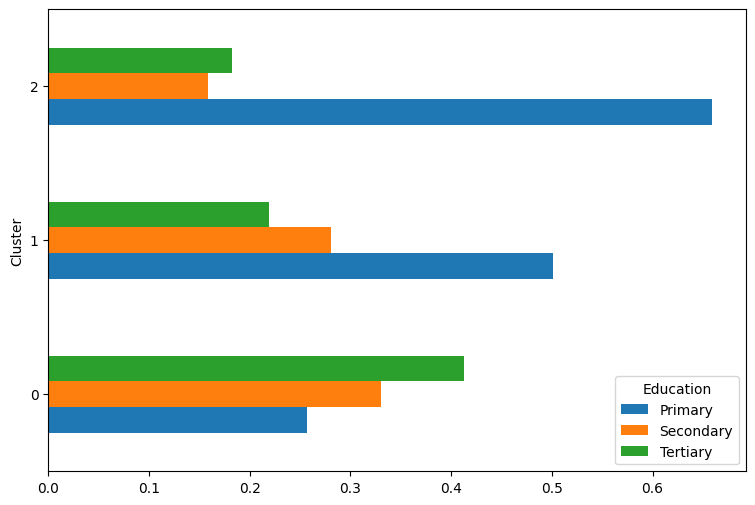

In [31]:
res = bank_scaled.groupby('Cluster')['Education'].value_counts(normalize=True)

res.unstack().plot.barh(figsize=[9,6])
plt.show()